# 15-plots in plotly

In [1]:
# !pip install plotly
# install above if plotly is not installed



In [2]:
# import libraries
import pandas as pd # for dataframes
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import plotly.express as px # for plotting

In [3]:
# import dataset
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# 1. Scatter plot

In [6]:
fig1=px.scatter(df,x="sepal_length",y="sepal_width",color='species')

fig1.show()

# to save output

fig1.write_image("./output_vis/scatter.png")

# 02_Line plot

In [7]:
# sort the data
df_line = df.sort_values(by=['sepal_length'])
fig2=px.line(df_line,x="sepal_length",y="sepal_width",color="species")
fig2.show()

# save the output
fig2.write_image("./output_vis/line.png")

In [8]:
# pip install -U kaleido


# 03_bar plot  

In [9]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [10]:
fig3=px.bar(df_bar,x="species",y="sepal_length")
fig3.show()

fig3.write_image("./output_vis/barplot.png")

<Axes: xlabel='species', ylabel='sepal_length'>

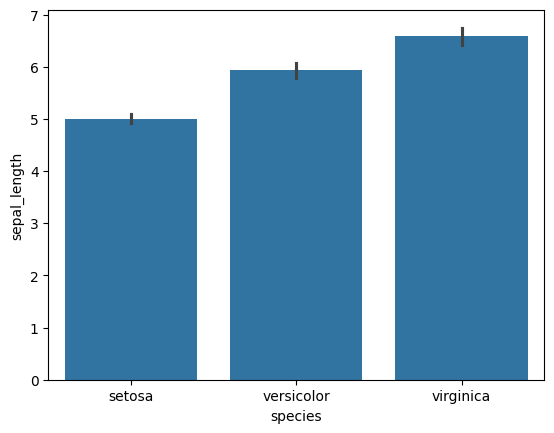

In [11]:
# seaborn does not require means
sns.barplot(data=df,x="species",y="sepal_length")

# 04 boxplot

In [12]:
fig4=px.box(df,x="species",y="sepal_width",color="species")

fig4.show()

fig4.write_image("./output_vis/boxplot.png")

# 05  Violin plot

In [13]:
fig5=px.violin(df,x="species",y="sepal_length",color="species",box=True)

fig5.show()

fig5.write_image("./output_vis/violin plot.png")

# 6.Histogram

In [14]:
fig6=px.histogram(df,x="sepal_length",color="species")

fig6.show()

fig6.write_image("./output_vis/histplot.png",scale=3)

# 7.pie chart

In [15]:
# first we have to check the dataset
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [16]:
df_pie=df['species'].value_counts().reset_index()
df_pie.columns=['species','count']

fig7=px.pie(df_pie,values="count",names="species")
fig7.show()

fig7.write_image("./output_vis/piechart.png")

# 8 scatter 3D plot

In [17]:
fig8=px.scatter_3d(df,x="sepal_length",y="sepal_width",z="petal_width",color='species')
fig8.show()

fig8.write_image("./output_vis/3D.png")

# 9.Area chart

In [18]:

# area chart
df_area = df.sort_values(by=['sepal_length'])

fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()

# save the plot
fig9.write_image("./output_vis/fig9.png", scale=3)

# 10 Bubble chart

In [19]:


fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show()

# 11. Sunburst chart

In [20]:
# 11 sunburst chart
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()

#save this plot
fig11.write_image("./output_vis/fig11.png", scale=3)

In [21]:
# create sunburst plot on titanic dataset
import plotly.express as px
import seaborn as sns
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Create a sunburst plot
fig = px.sunburst(titanic, 
                  path=['sex','class', 'who', 'alive', 'alone'], 
                  values='survived' , color='sex')
# Show the plot
fig.show()

c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

# 12 parallel chart

In [22]:
# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()
#save the plot
fig12.write_image("./output_vis/paralelcord.png", scale=3)

# 13 Density contor plot

In [28]:
# Desity contour plot

fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()
# save this plot
fig13.write_image("./output_vis/fig13.png", scale=3)

# 14 Ternary plot

In [31]:
fig14=px.scatter_ternary(df,a="sepal_length",b="petal_width",c="petal_length",color="species")
fig14.show()
fig14.write_image("./output_vis/ternary_plot.png")

# 15 Polar chart

In [34]:
# Polar chart (Radar Chart)

df_radar = df.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()

# save the plot
fig15.write_image("./output_vis/fig15.png", scale=3)